<a href="https://colab.research.google.com/github/Mostafa-Rawash/AI/blob/main/vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Import Modules 
# import os
# import cv2
# import  mediapipe as mp4
# import time


In [ ]:
# #  Init. functions
# def get_videos(path):
#      names = []
#      os.chdir(path)
#      # iterate through all file
#      for folder in os.listdir():
#           names.append(folder)
#           # # names[folder] = []
#           # # print(f"------------------------ {folder} -------------------")
#           # os.chdir(path+f"\{folder}")
#           # for video in os.listdir():
#           #      names.append({ "label" : folder , "path" :  os.getcwd() + "\\" + video })
#           #      # print(type(video))
#      return names
# # Folder Path


# def get_dataset(path):

#      mpDraw = mp.solutions.drawing_utils
#      mpPose = mp.solutions.pose
#      pose = mpPose.Pose()
#      global v 
#      print("get videos paths")
#      dataset = get_videos(path)
#      print(dataset[0])
#      print("videos paths done " ) # print("videos paths done " , dataset)
#      for video in dataset:
#           print(video['path'])
#           cap = cv2.VideoCapture(video['path'])
#           past_time = 0
#           video['land_marks'] = []
#           while True:
#                cur_time = time.time() - past_time
#                ret, frame = cap.read()
#                if ret == True:
#                     results = pose.process(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))
#                     if results.pose_landmarks:
#                          video['land_marks'].append([cur_time , results.pose_landmarks ]) 
#                          past_time = time.time()
#                          mpDraw.draw_landmarks(frame , results.pose_landmarks , mpPose.POSE_CONNECTIONS )
#                     # cv2.putText(frame , str(video['path']) , ( 0 , 10 ) , cv2.FONT_HERSHEY_PLAIN , 0.5 , (255 , 0 , 0) , 1 )
#                     # Display the resulting frame
#                     cv2.imshow('Frame',frame)
#                     # print(frame.shape)

#                     # Press Q on keyboard to  exit
#                     if cv2.waitKey(1) & 0xFF == ord('q'):
#                          break
#                else: 
#                     print(cap.read())
#                     break

#                     # When everything done, release the video capture object
#           v = dataset
#           cap.release()
#           cv2.destroyAllWindows()
#      return dataset


In [ ]:

# path = "f:\studing\weizmann Dataset"
# dataset =  get_videos(path)
# print(dataset)


In [ ]:
# !pip install imutils
     

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/weizmannDataset.zip" "/content/weizmannDataset.zip"
!unzip "/content/weizmannDataset.zip"


Archive:  /content/weizmannDataset.zip
   creating: weizmann Dataset/
   creating: weizmann Dataset/bend/
  inflating: weizmann Dataset/bend/eli_bend.avi  
  inflating: weizmann Dataset/bend/ido_bend.avi  
  inflating: weizmann Dataset/bend/ira_bend.avi  
  inflating: weizmann Dataset/bend/lena_bend.avi  
  inflating: weizmann Dataset/bend/lyova_bend.avi  
  inflating: weizmann Dataset/bend/moshe_bend.avi  
  inflating: weizmann Dataset/bend/shahar_bend.avi  
  inflating: weizmann Dataset/bend/daria_bend.avi  
  inflating: weizmann Dataset/bend/denis_bend.avi  
   creating: weizmann Dataset/jack/
  inflating: weizmann Dataset/jack/lena_jack.avi  
  inflating: weizmann Dataset/jack/lyova_jack.avi  
  inflating: weizmann Dataset/jack/moshe_jack.avi  
  inflating: weizmann Dataset/jack/shahar_jack.avi  
  inflating: weizmann Dataset/jack/daria_jack.avi  
  inflating: weizmann Dataset/jack/denis_jack.avi  
  inflating: weizmann Dataset/jack/eli_jack.avi  
  inflating: weizmann Dataset/jack

In [ ]:

args = { "label-bin": "content/output/lb.pickle", "epochs":50}
# epochs : # of epochs to train our network for
# label-bin : path to output model

In [ ]:
 = "/pathcontent/weizmann Dataset/"

print(list(paths.list_files(path)))
# print()


['/content/weizmann Dataset/run/daria_run.avi', '/content/weizmann Dataset/run/lena_run2.avi', '/content/weizmann Dataset/run/moshe_run.avi', '/content/weizmann Dataset/run/denis_run.avi', '/content/weizmann Dataset/run/eli_run.avi', '/content/weizmann Dataset/run/shahar_run.avi', '/content/weizmann Dataset/run/lena_run1.avi', '/content/weizmann Dataset/run/ira_run.avi', '/content/weizmann Dataset/run/lyova_run.avi', '/content/weizmann Dataset/run/ido_run.avi', '/content/weizmann Dataset/pjump/moshe_pjump.avi', '/content/weizmann Dataset/pjump/daria_pjump.avi', '/content/weizmann Dataset/pjump/ido_pjump.avi', '/content/weizmann Dataset/pjump/ira_pjump.avi', '/content/weizmann Dataset/pjump/lyova_pjump.avi', '/content/weizmann Dataset/pjump/eli_pjump.avi', '/content/weizmann Dataset/pjump/lena_pjump.avi', '/content/weizmann Dataset/pjump/shahar_pjump.avi', '/content/weizmann Dataset/pjump/denis_pjump.avi', '/content/weizmann Dataset/skip/lena_skip2.avi', '/content/weizmann Dataset/skip/

In [ ]:
# initialize the set of labels from the spots activity dataset we are
# going to train our network on
LABELS = set(['bend', 'jack', 'jump', 'pjump', 'run', 'side', 'skip', 'walk', 'wave1', 'wave2'])   # Category of dataset
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading videos...")
videopaths = list(paths.list_files(path ))
data = [] # To store every frame
labels = [] # To store category for each frame
# loop over the image paths
for videoPath in videopaths:
	counter = 0 
	# extract the class label from the filename
	label = videoPath.split(os.path.sep)[-2]
	print(label)
	# if the label of the current image is not part of of the labels
	# are interested in, then ignore the image
	if label not in LABELS:
		continue
	# load the image, convert it to RGB channel ordering, and resize
	# it to be a fixed 224x224 pixels, ignoring aspect ratio
	cap = cv2.VideoCapture(videoPath)
	while True:
		ret, frame = cap.read()
		if ret == True:
			frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
			frame = cv2.resize(frame, (224, 224))
			data.append(frame)
			labels.append(label)
			counter += 1
		else: 
			break

			# When everything done, release the video capture object
	print(f"# of frames in this {videoPath.split(os.path.sep)[-1]} video is {counter}")

[INFO] loading videos...
run
# of frames in this daria_run.avi video is 42
run
# of frames in this lena_run2.avi video is 32
run
# of frames in this moshe_run.avi video is 42
run
# of frames in this denis_run.avi video is 41
run
# of frames in this eli_run.avi video is 50
run
# of frames in this shahar_run.avi video is 46
run
# of frames in this lena_run1.avi video is 29
run
# of frames in this ira_run.avi video is 56
run
# of frames in this lyova_run.avi video is 36
run
# of frames in this ido_run.avi video is 36
pjump
# of frames in this moshe_pjump.avi video is 45
pjump
# of frames in this daria_pjump.avi video is 62
pjump
# of frames in this ido_pjump.avi video is 48
pjump
# of frames in this ira_pjump.avi video is 127
pjump
# of frames in this lyova_pjump.avi video is 55
pjump
# of frames in this eli_pjump.avi video is 42
pjump
# of frames in this lena_pjump.avi video is 49
pjump
# of frames in this shahar_pjump.avi video is 56
pjump
# of frames in this denis_pjump.avi video is 54

In [ ]:
# convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)


In [ ]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()  
labels = lb.fit_transform(labels)

In [ ]:
# partition the data into training and testing splits using 70% of
# the data for training and the remaining 30% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.3)
     


In [ ]:
# load the ResNet-50 network, ensuring the head FC layer sets are left
# off
baseModel = ResNet50(weights="imagenet", include_top=False,	input_tensor=Input(shape=(224, 224, 3)))


94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
for layer in baseModel.layers:
	layer.trainable = False


In [ ]:
     # compile our model (this needs to be done after our setting our
# layers to being non-trainable)
print("[INFO] compiling model...")
opt = SGD(learning_rate=1e-4, momentum=0.9 , decay=1e-4 / args["epochs"]) #
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])


[INFO] compiling model...


In [ ]:
args["epochs"]

50

In [ ]:
# train the head of the network for a few epochs (all other layers
# are frozen) -- this will allow the new FC layers to start to become
# initialized with actual "learned" values versus pure random
batch_size = 32
print("[INFO] training head...")
H = model.fit(
	x=trainX,
	steps_per_epoch=len(trainX) ,
	validation_data=testX
	,epochs=args["epochs"]
	,validation_steps=len(testX) 
	)#	

[INFO] training head...
Epoch 1/50
3990/3990 [==============================] - 69s 14ms/step - loss: 2.6293 - accuracy: 0.1338 - val_loss: 2.0047 - val_accuracy: 0.3331


[INFO] evaluating network...
              precision    recall  f1-score   support

        bend       0.44      0.26      0.32       192
        jack       0.62      0.53      0.57       219
        jump       0.29      0.44      0.35       137
       pjump       0.00      0.00      0.00       162
         run       0.00      0.00      0.00       123
        side       0.25      0.02      0.03       133
        skip       0.22      0.01      0.03       147
        walk       0.34      0.72      0.46       215
       wave1       0.21      0.33      0.26       196
       wave2       0.28      0.64      0.39       187

    accuracy                           0.33      1711
   macro avg       0.27      0.30      0.24      1711
weighted avg       0.29      0.33      0.27      1711



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: ignored

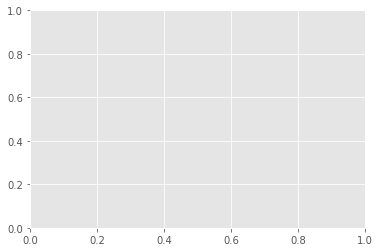

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(x=testX)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))
# plot the training loss and accuracy
N =   args["epochs"]
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])
